In [ ]:
import os
home = "/content"
os.chdir(home)
os.getcwd()

'/content'

In [ ]:
# Install specified versions of `torch` and `torchvision`, before installing mmf (causes an issue)
!pip install torch==1.6.0 torchvision==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 552.8 MB 3.8 kB/s 
     |████████████████████████████████| 5.8 MB 59.3 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.6.0+cu92 which is incompatible.


In [ ]:
# Clone the following repo where mmf does not install default image features, 
# since we will use our own features
!git clone --branch no_feats --config core.symlinks=true https://github.com/rizavelioglu/mmf.git

Cloning into 'mmf'...
remote: Enumerating objects: 16724, done.
remote: Total 16724 (delta 0), reused 0 (delta 0), pack-reused 16724
Receiving objects: 100% (16724/16724), 12.78 MiB | 21.49 MiB/s, done.
Resolving deltas: 100% (10764/10764), done.


In [ ]:
import os
os.chdir(os.path.join(home, "mmf"))

In [ ]:
!pip install --editable .

Obtaining file:///content/mmf
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 30.0 MB/s 
     |████████████████████████████████| 1.5 MB 31.4 MB/s 
     |████████████████████████████████| 131 kB 55.2 MB/s 
     |████████████████████████████████| 450 kB 52.3 MB/s 
     |████████████████████████████████| 869 kB 45.0 MB/s 
     |████████████████████████████████| 73 kB 1.3 MB/s 
     |████████████████████████████████| 57 kB 5.7 MB/s 
     |████████████████████████████████| 76 kB 4.9 MB/s 
  Using cached pybind11-2.7.1-py2.py3-none-any.whl (200 kB)
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 636 kB 57.5 MB/s 
     |████████████████████████████████| 1.2 MB 45.3 MB/s 
     |████████████████████████████████| 2.9 MB 46.8 MB/s 
     |████████████████████████████████| 895 kB 63.0 MB/s 
Reason for being yanked: <none given>


In [ ]:
!mmf_convert_hm --zip_file="/content/drive/MyDrive/Facebook Hateful Memes Challenge.zip" --password=$None --bypass_checksum 1

2021-08-08 06:47:38.423205: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/content/mmf/mmf/utils/configuration.py:536: UserWarning: Device specified is 'cuda' but cuda is not present. Switching to CPU version.
  "Device specified is 'cuda' but cuda is not present. "
Data folder is /root/.cache/torch/mmf/data
Zip path is /content/drive/MyDrive/Facebook Hateful Memes Challenge.zip
Copying /content/drive/MyDrive/Facebook Hateful Memes Challenge.zip
Unzipping /content/drive/MyDrive/Facebook Hateful Memes Challenge.zip
Extracting the zip can take time. Sit back and relax.
/content/mmf/mmf_cli/hm_convert.py:56: UserWarning: You are on Phase 1 of the Hateful Memes Challenge. Please update to Phase 2
  "You are on Phase 1 of the Hateful Memes Challenge. "
Moving train.jsonl
Moving dev.jsonl
Moving test.jsonl
Moving img


In [ ]:
# Free up the disk by removing .zip, .tar files
!rm -rf /root/.cache/torch/mmf/data/datasets/hateful_memes/defaults/Facebook Hateful Memes Challenge.zip
!rm -rf $home/mmf/Facebook Hateful Memes Challenge.zip

In [ ]:
os.chdir(home)
# download HM dataset features
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1YGigTCQQlVvS726YuECTMx0He8p0Xle2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1YGigTCQQlVvS726YuECTMx0He8p0Xle2" -O 'feats_hm.zip' && rm -rf /tmp/cookies.txt
# download Memotion dataset features
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=11o35vKEMDQjvHV42aYMzwjEVlIDZIe1a' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=11o35vKEMDQjvHV42aYMzwjEVlIDZIe1a" -O 'feats_memotion.zip' && rm -rf /tmp/cookies.txt

In [ ]:
# Unzip features for HM dataset & remove it to free disk
!unzip "/content/drive/MyDrive/feats_hm.zip" -d $home/features/

Streaming output truncated to the last 5000 lines.
  inflating: /content/features/feats_hm/75230_info.npy  
  inflating: /content/features/feats_hm/24658.npy  
  inflating: /content/features/feats_hm/96270.npy  
  inflating: /content/features/feats_hm/18273.npy  
  inflating: /content/features/feats_hm/21978_info.npy  
  inflating: /content/features/feats_hm/03524_info.npy  
  inflating: /content/features/feats_hm/38469_info.npy  
  inflating: /content/features/feats_hm/96578_info.npy  
  inflating: /content/features/feats_hm/98657.npy  
  inflating: /content/features/feats_hm/15738.npy  
  inflating: /content/features/feats_hm/68713.npy  
  inflating: /content/features/feats_hm/89610.npy  
  inflating: /content/features/feats_hm/82730_info.npy  
  inflating: /content/features/feats_hm/71309_info.npy  
  inflating: /content/features/feats_hm/61834.npy  
  inflating: /content/features/feats_hm/24107.npy  
  inflating: /content/features/feats_hm/70326.npy  
  inflating: /content/features

In [ ]:
# os.chdir(home)
# # Download the fine-tuned model
# !wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1NOX2lJkbK7sKRsg4_y_KUcLamknowsu2' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1NOX2lJkbK7sKRsg4_y_KUcLamknowsu2" -O 'submission#1.zip' && rm -rf /tmp/cookies.txt
# #unzip the model
!unzip -qq "/content/drive/MyDrive/submission#1.zip" -d $home/submission#1

In [ ]:
# Validate the model on the dev_unseen data
os.chdir(home)
# where checkpoint is
ckpt_dir = os.path.join(home, "submission#1/best.ckpt")
feats_dir = os.path.join(home, "features/feats_hm")

!mmf_run config="projects/visual_bert/configs/hateful_memes/defaults.yaml" \
    model="visual_bert" \
    dataset=hateful_memes \
    run_type=val \
    checkpoint.resume_file=$ckpt_dir \
    checkpoint.reset.optimizer=True \
    dataset_config.hateful_memes.annotations.val[0]=hateful_memes/defaults/annotations/dev.jsonl \
    dataset_config.hateful_memes.annotations.test[0]=hateful_memes/defaults/annotations/test.jsonl \
    dataset_config.hateful_memes.features.train[0]=$feats_dir \
    dataset_config.hateful_memes.features.val[0]=$feats_dir \
    dataset_config.hateful_memes.features.test[0]=$feats_dir \

2021-08-08 07:42:20.701121: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/content/mmf/mmf/utils/configuration.py:536: UserWarning: Device specified is 'cuda' but cuda is not present. Switching to CPU version.
  "Device specified is 'cuda' but cuda is not present. "
/usr/local/lib/python3.7/dist-packages/omegaconf/dictconfig.py:252: UserWarning: Keys with dot (model.bert) are deprecated and will have different semantic meaning the next major version of OmegaConf (2.1)
See the compact keys issue for more details: https://github.com/omry/omegaconf/issues/152
You can disable this warning by setting the environment variable OC_DISABLE_DOT_ACCESS_WARNING=1
  warnings.warn(message=msg, category=UserWarning)
2021-08-08T07:42:28 | mmf.utils.configuration: Overriding option config to projects/visual_bert/configs/hateful_memes/defaults.yaml
2021-08-08T07:42:28 | mmf.utils.configuration: Overriding option model to visual_bert

In [ ]:
os.chdir(home)
# where checkpoint is
ckpt_dir = os.path.join(home, "submission#1/best.ckpt")
feats_dir = os.path.join(home, "features/feats_hm")

!mmf_predict config="projects/visual_bert/configs/hateful_memes/defaults.yaml" \
    model="visual_bert" \
    dataset=hateful_memes \
    run_type=test \
    checkpoint.resume_file=$ckpt_dir \
    checkpoint.reset.optimizer=True \
    dataset_config.hateful_memes.annotations.val[0]=hateful_memes/defaults/annotations/dev.jsonl \
    dataset_config.hateful_memes.annotations.test[0]=hateful_memes/defaults/annotations/dev.jsonl \
    dataset_config.hateful_memes.features.train[0]=$feats_dir \
    dataset_config.hateful_memes.features.val[0]=$feats_dir \
    dataset_config.hateful_memes.features.test[0]=$feats_dir \

2021-08-08 07:51:35.310940: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
/content/mmf/mmf/utils/configuration.py:536: UserWarning: Device specified is 'cuda' but cuda is not present. Switching to CPU version.
  "Device specified is 'cuda' but cuda is not present. "
/usr/local/lib/python3.7/dist-packages/omegaconf/dictconfig.py:252: UserWarning: Keys with dot (model.bert) are deprecated and will have different semantic meaning the next major version of OmegaConf (2.1)
See the compact keys issue for more details: https://github.com/omry/omegaconf/issues/152
You can disable this warning by setting the environment variable OC_DISABLE_DOT_ACCESS_WARNING=1
  warnings.warn(message=msg, category=UserWarning)
2021-08-08T07:51:38 | mmf.utils.configuration: Overriding option config to projects/visual_bert/configs/hateful_memes/defaults.yaml
2021-08-08T07:51:38 | mmf.utils.configuration: Overriding option model to visual_bert

In [ ]:
import pandas as pd
true_label_df = pd.read_json('/content/drive/MyDrive/ITU/DL/data/dev.jsonl',lines=True)
true_label_df.head()

id  ...                                               text
0   8291  ...              white people is this a shooting range
1  46971  ...                              bravery at its finest
2   3745  ...  your order comes to $37.50 and your white priv...
3  83745  ...  it is time.. to send these parasites back to t...
4  80243  ...                             mississippi wind chime

[5 rows x 4 columns]

In [ ]:
pred_label_df = pd.read_csv("/content/save/hateful_memes_visual_bert_38777007/reports/hateful_memes_run_test_2021-08-08T07:58:16.csv")
pred_label_df

id     proba  label
0     8291  0.134598      0
1    46971  0.002006      0
2     3745  0.135013      0
3    83745  0.002419      0
4    80243  0.993939      1
..     ...       ...    ...
495  83675  0.061938      0
496  37198  0.000168      0
497  48670  0.005221      0
498   9863  0.000628      0
499  97320  0.002345      0

[500 rows x 3 columns]

In [ ]:
true_label_df.img[0].split('/')[-1]

'08291.png'

In [ ]:
wrong = []
correct = []
w_pred_label = []
w_true_label = []
c_pred_label = []
c_true_label = [] 
for x in range(50):
  if true_label_df.label[x] == pred_label_df.label[x]:
    img = true_label_df.img[x].split('/')[-1]
    correct.append(img)
    c_pred_label.append(pred_label_df.label[x])
    c_true_label.append(true_label_df.label[x])
  else:
    img = true_label_df.img[x].split('/')[-1]
    wrong.append(img)
    w_pred_label.append(pred_label_df.label[x])
    w_true_label.append(true_label_df.label[x])



/content/drive/MyDrive/ITU/DL/data/img/08291.png


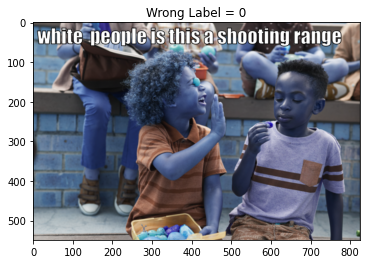

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
path = "/content/drive/MyDrive/ITU/DL/data/img"+'/'+wrong[0]
print(path)
img = cv2.imread(path)
# cv2_imshow(img)
plt.title("Wrong Label = "+str(wlabel[0]))
plt.imshow(img)

## Wrong classifications

Predicted Label = 0  Actual Label =  1 index =  20




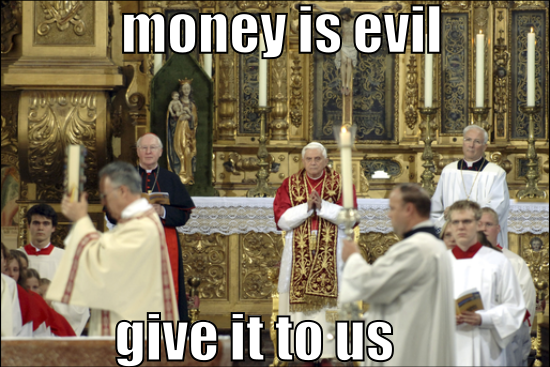



Predicted Label = 0  Actual Label =  1 index =  21




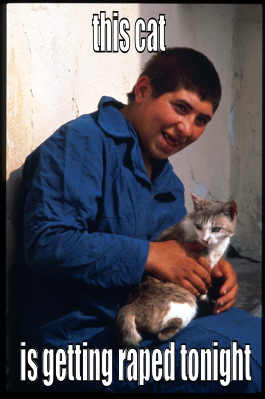

In [ ]:

for x in range(20,22):
  path = "/content/drive/MyDrive/ITU/DL/data/img"+'/'+wrong[x]
  image = cv2.imread(path)
  print("Predicted Label = "+str(w_pred_label[x])," Actual Label = ",str(w_true_label[x]),"index = ",x)
  print("\n") 
  cv2_imshow(image)
  print('\n')

## Correct Predictions

Predicted Label = 1  Actual Label =  1 index =  10




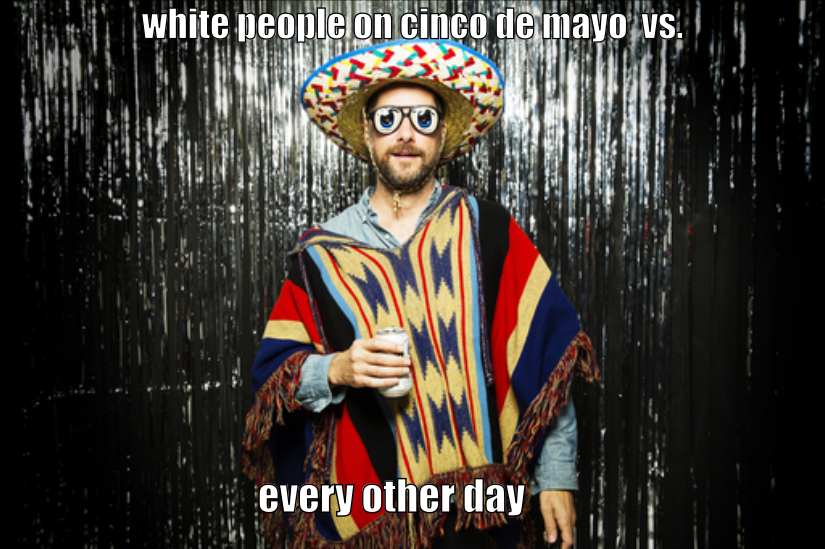



Predicted Label = 1  Actual Label =  1 index =  11




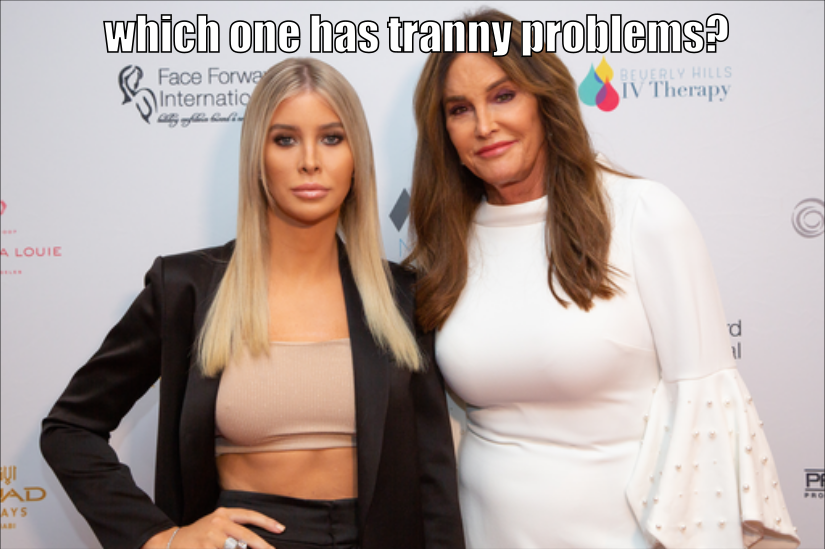



Predicted Label = 1  Actual Label =  1 index =  12




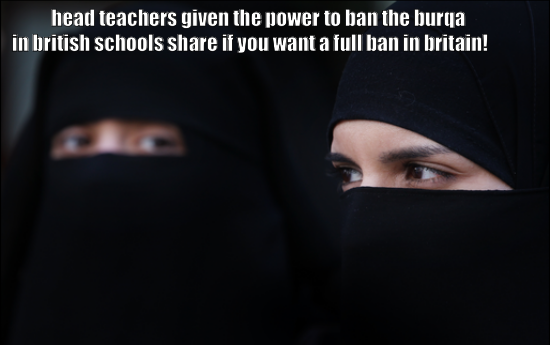



Predicted Label = 1  Actual Label =  1 index =  13




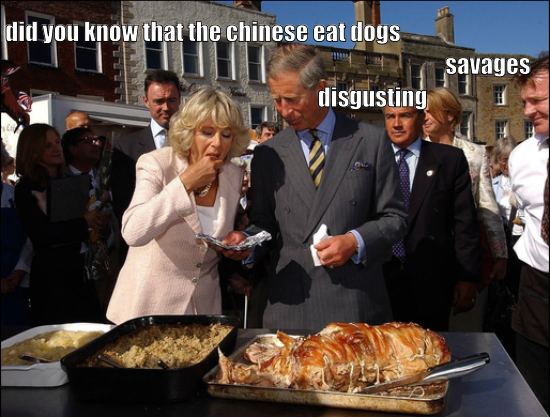



Predicted Label = 1  Actual Label =  1 index =  14




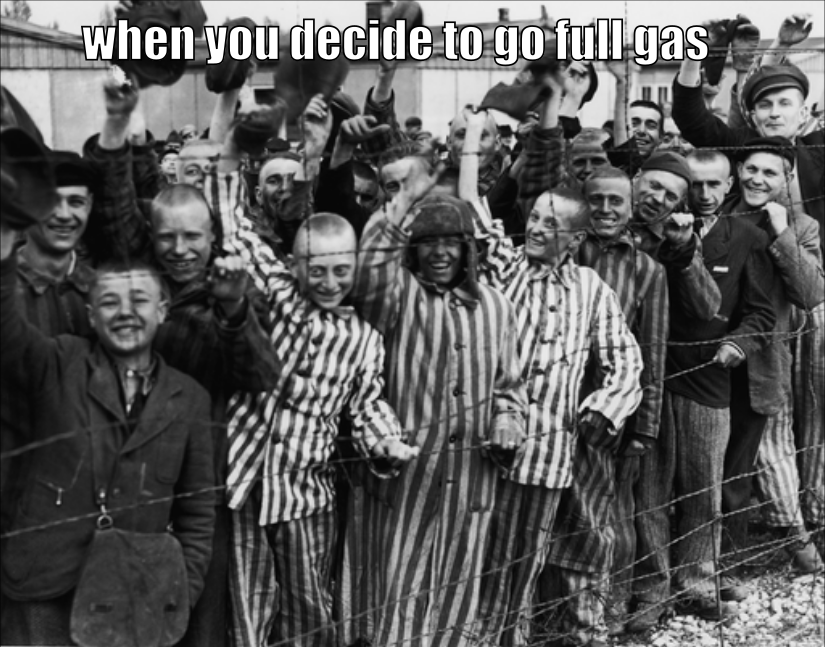



Predicted Label = 1  Actual Label =  1 index =  15




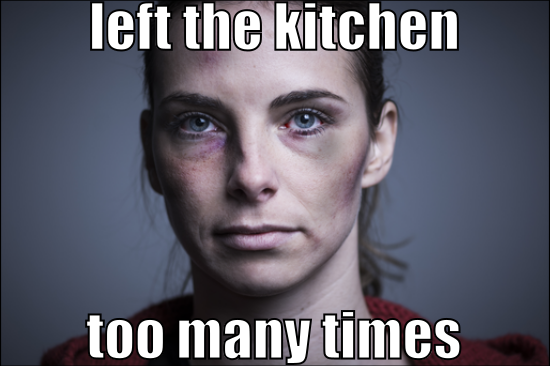



Predicted Label = 1  Actual Label =  1 index =  16




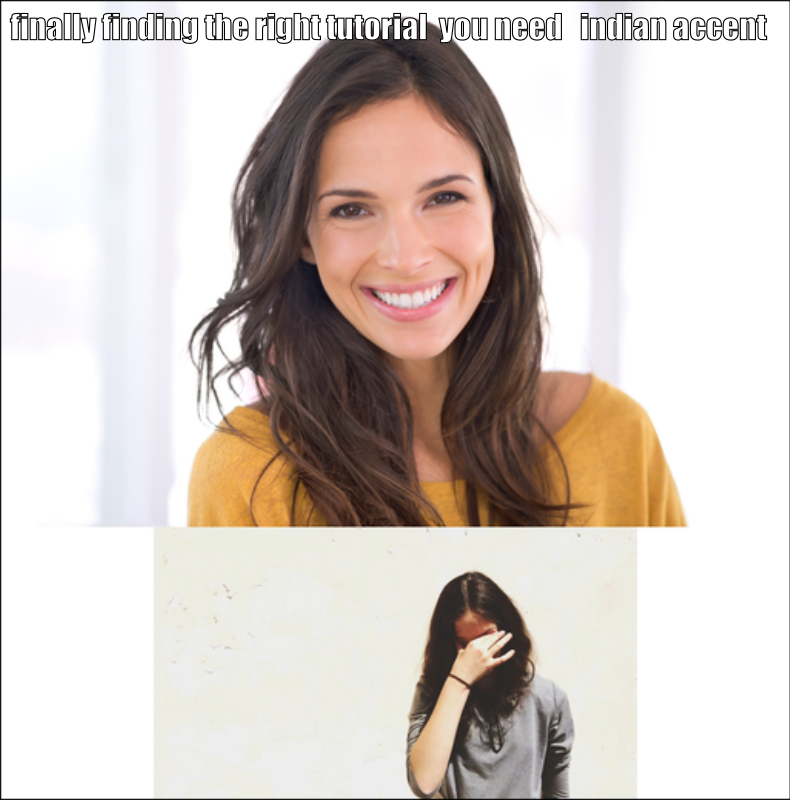



Predicted Label = 1  Actual Label =  1 index =  17




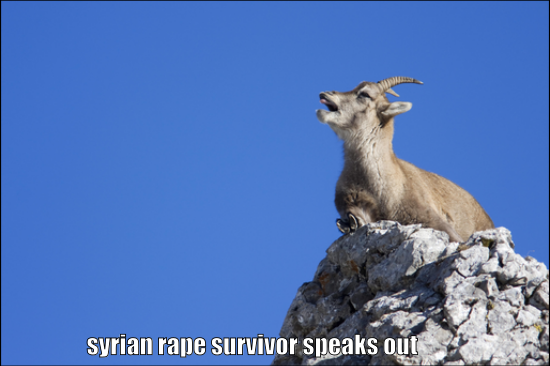



Predicted Label = 1  Actual Label =  1 index =  18




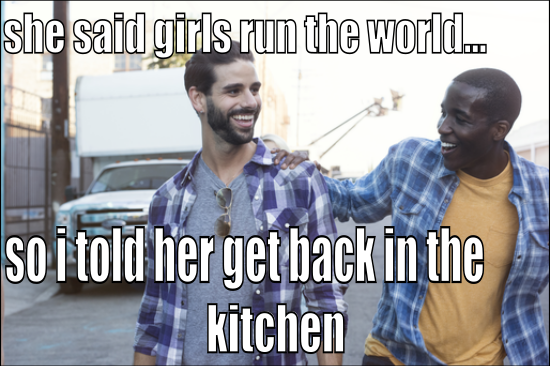



Predicted Label = 1  Actual Label =  1 index =  19




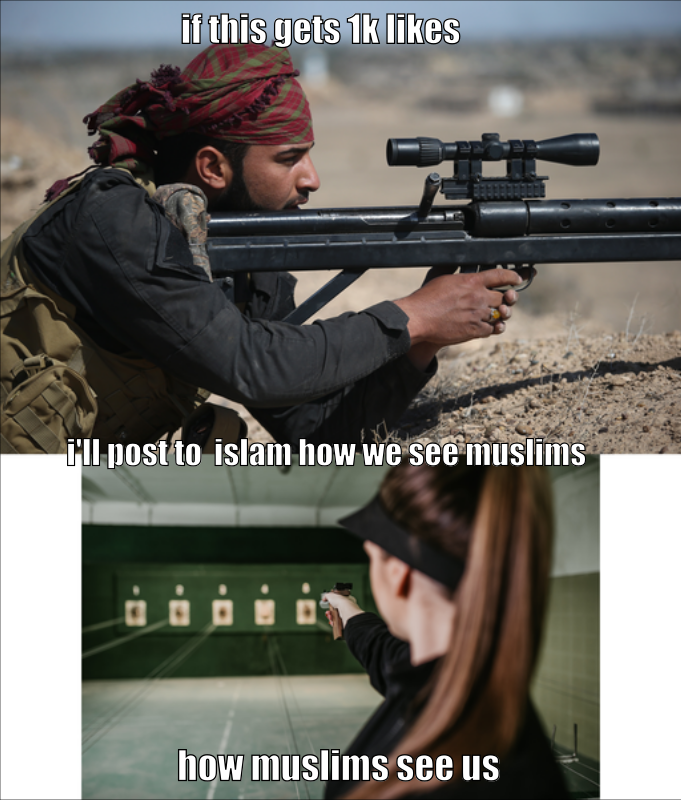

In [ ]:
for x in range(10,20):
  path = "/content/drive/MyDrive/ITU/DL/data/img"+'/'+correct[x]
  image = cv2.imread(path)
  print("Predicted Label = "+str(c_pred_label[x])," Actual Label = ",str(c_true_label[x]),"index = ",x)
  print("\n") 
  cv2_imshow(image)
  print('\n')